Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

Load Dataset

In [2]:
cars_df = pd.read_csv("Cars.csv")

In [3]:
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Make: The manufacturer or brand of the vehicle (e.g., BMW, Ford, Toyota).

# Model: The specific model name of the vehicle (e.g., 1 Series, 1 Series M).

# Year: The year the vehicle was manufactured.

# Engine Fuel Type: The type of fuel the engine requires (e.g., regular unleaded, premium unleaded).

# Engine HP: Engine horsepower – the power output of the engine in horsepower (numeric).

# Engine Cylinders: Number of cylinders in the engine (numeric, e.g., 4, 6, 8).

# Transmission Type: Type of transmission, e.g., MANUAL or AUTOMATIC.

# Driven_Wheels: Which wheels receive power from the engine, e.g., rear wheel drive (RWD), front wheel drive (FWD), all wheel drive (AWD).

# Number of Doors: How many doors the vehicle has (numeric, usually 2 or 4).

# Market Category: Vehicle categories it belongs to, often multiple categories separated by commas (e.g., Luxury, Performance).

# Vehicle Size: The overall size classification of the vehicle (e.g., Compact, Midsize, Large).

# Vehicle Style: The body style of the vehicle (e.g., Coupe, Sedan, Convertible, SUV).

# highway MPG: Fuel efficiency on highways, measured in miles per gallon.

# city mpg: Fuel efficiency in city driving conditions, measured in miles per gallon.

# Popularity: A numeric measure of how popular the vehicle is (could be based on sales or search interest).

# MSRP: Manufacturer’s Suggested Retail Price – the recommended selling price of the vehicle in USD. ---> [Target value]

In [5]:
# check null values
cars_df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Filling missing values

In [6]:
impute1 = SimpleImputer(strategy='median')
impute2 = SimpleImputer(strategy='most_frequent')

In [7]:
cars_df['Engine HP'] = impute1.fit_transform(cars_df[['Engine HP']]).ravel()

for col in ['Engine Cylinders' , 'Market Category' , 'Engine Fuel Type']:
    cars_df[col] = impute2.fit_transform(cars_df[[col]]).ravel()

In [8]:
# check null values after impute
cars_df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [9]:
# check duplicates
print(f'Duplicates in dataset = {cars_df.duplicated().sum()}')

Duplicates in dataset = 715


In [10]:
cars_df = cars_df.drop_duplicates()

In [11]:
# check duplicates after drop
print(f'Duplicates in dataset = {cars_df.duplicated().sum()}')

Duplicates in dataset = 0


Explore Dataset

In [12]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    11199 non-null  object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [13]:
cars_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.226270,5.661488,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,109.830464,1.796677,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,236.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


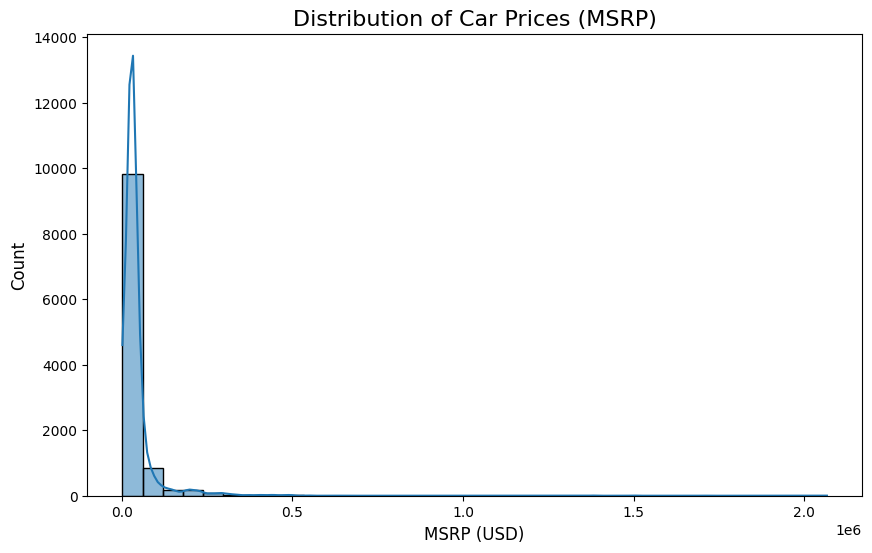

In [38]:
# check balanced or not
plt.figure(figsize=(10,6))
sns.histplot(cars_df, x='MSRP', bins=35, kde=True)
plt.title("Distribution of Car Prices (MSRP)", fontsize=16)
plt.xlabel("MSRP (USD)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Encode Catg cols

In [14]:
catg_cols = cars_df.select_dtypes(object).columns.to_list()
catg_cols

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [15]:
# ['Make', -> LabelEncode 
# # 'Model', -> freq encode
#  # 'Engine Fuel Type', -> Label Encode
#  # 'Transmission Type', -> Label Encode
#  # 'Driven_Wheels', -> Label Encode
#  # 'Market Category', -> Freq encode 
# # 'Vehicle Size', -> Ordinal Encode 
# # 'Vehicle Style' -> One Hot Encode  ]

In [16]:
# Label Encode
l_encoder = LabelEncoder()

for col in catg_cols:
    if col not in ['Model' , 'Market Category' , 'Vehicle Size' , 'Vehicle Style']:
        cars_df[col] = l_encoder.fit_transform(cars_df[col])

In [17]:
# Frequency encode
freq1 = cars_df['Market Category'].value_counts()
freq2 = cars_df['Model'].value_counts()

cars_df['Market Category_FE'] = cars_df['Market Category'].map(freq1)
cars_df['Model_FE'] = cars_df['Model'].map(freq2)

In [18]:
# Ordinal Encode
od_encode = OrdinalEncoder()

cars_df['Vehicle Size'] = od_encode.fit_transform(cars_df[['Vehicle Size']])

In [19]:
# One Hot Encode
ohe = OneHotEncoder(sparse_output=False)

encoded_array = ohe.fit_transform(cars_df[['Vehicle Style']])
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['Vehicle Style']), index=cars_df.index)
cars_encoded_df = pd.concat([cars_df, encoded_df], axis=1).drop(['Model','Market Category','Vehicle Style'] , axis=1)

In [20]:
cars_encoded_df.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,4,2011,8,335.0,6.0,3,3,2.0,0.0,26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2011,8,300.0,6.0,3,3,2.0,0.0,28,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2011,8,300.0,6.0,3,3,2.0,0.0,28,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2011,8,230.0,6.0,3,3,2.0,0.0,28,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2011,8,230.0,6.0,3,3,2.0,0.0,28,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scale data

In [21]:
scaler = StandardScaler()

Data Split

In [22]:
X = cars_encoded_df.drop(['MSRP'] , axis=1)
y = cars_encoded_df[['MSRP']]

In [23]:
X.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,highway MPG,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,4,2011,8,335.0,6.0,3,3,2.0,0.0,26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2011,8,300.0,6.0,3,3,2.0,0.0,28,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2011,8,300.0,6.0,3,3,2.0,0.0,28,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2011,8,230.0,6.0,3,3,2.0,0.0,28,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2011,8,230.0,6.0,3,3,2.0,0.0,28,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y.head()

,MSRP
0,46135
1,40650
2,36350
3,29450
4,34500


In [25]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Solve Imbalanced

In [27]:
# Transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

Create Linear Regression model

In [28]:
lr_model = LinearRegression()

In [29]:
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train_scaled)
X_test_imp = imputer.transform(X_test_scaled)  # transform your test/val the same way

In [30]:
lr_model.fit(X_train_imp , y_train_log)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Make predictions
lr_pred = lr_model.predict(X_test_imp)

Evaluate Model

In [32]:
print(f'R2_score for Linear regression model = {r2_score(y_test_log,lr_pred)}')
print(f'MAE for Linear regression model = {mean_absolute_error(y_test_log,lr_pred)}')
print(f'MSE for Linear regression model = {mean_squared_error(y_test_log,lr_pred)}')
print(f'RMSE for Linear regression model = {np.sqrt(mean_squared_error(y_test_log,lr_pred))}')

R2_score for Linear regression model = 0.8071859497666669
MAE for Linear regression model = 0.34941642422452557
MSE for Linear regression model = 0.21838381728005993
RMSE for Linear regression model = 0.46731554358918975


Visualize predictions

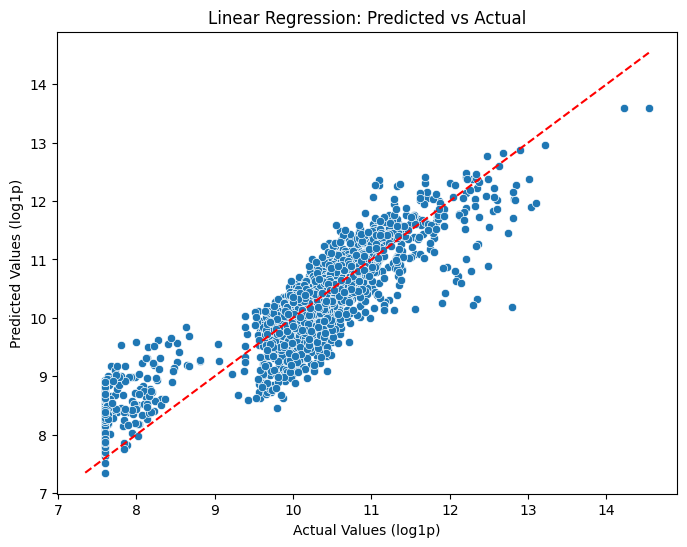

In [33]:
# Flatten to 1D
y_test_log_flat = np.ravel(y_test_log)
lr_pred_flat = np.ravel(lr_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_log_flat, y=lr_pred_flat)
plt.xlabel("Actual Values (log1p)")
plt.ylabel("Predicted Values (log1p)")
plt.title("Linear Regression: Predicted vs Actual")

# Diagonal line in log scale
min_val = min(y_test_log_flat.min(), lr_pred_flat.min())
max_val = max(y_test_log_flat.max(), lr_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()